# **Loading and Cleaning the dataset**

In [5]:
! pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\asrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Employing the inclusion of pivotal libraries vital for subsequent analysis and modeling procedures.


In [1]:
! pip install keras


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\asrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
! pip install sci-kit learn

ERROR: Could not find a version that satisfies the requirement sci-kit (from versions: none)
ERROR: No matching distribution found for sci-kit

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\asrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
! pip install plotly


^C


In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from  keras.layers import Dense,Dropout,LSTM,GRU,SimpleRNN,Conv1D,Bidirectional,Flatten,Dense,Input
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import plotly as px

Initiating the data acquisition process by comprehensively parsing the dataset, a foundational step in information assimilation.

In [8]:
df = pd.read_csv('Domestic_Maple_Syrup_Production_2000-2021.csv')

Enhancing data integrity entails meticulous alignment of date columns with appropriate data types, a cornerstone of meticulous data preprocessing.


In [9]:
df.shape

(220, 13)

In [10]:
df.columns

Index(['State', 'Num_of_Taps', 'Yield_per_Tap', 'Production', 'Avg_Price',
       'Value', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price',
       'Bulk_G_Price', 'Date_Open', 'Date_Closed', 'Year'],
      dtype='object')

In [11]:
x = ['Date_Open', 'Date_Closed']
for i in x:
  df[i] = pd.to_datetime(df[i],format='mixed')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year


Substitution of commas and periods within numerical columns to facilitate the alteration of their data types to floating-point values.Streamlining numerical columns mandates the meticulous removal of extraneous punctuation, such as commas and full stops, to facilitate the forthcoming dtype conversion

In [12]:
real_numeric_cols =["Production","Value", 'Wholesale_Price','Bulk_P_Price','Bulk_G_Price']
for i in real_numeric_cols:
  df[i]=df[i].str.replace(',', '')

Substituting the repetitive and nonsensical record in our dataset with a null value. Eliminating recurrent erroneous records, a data refinement maneuver, involves systematically substituting them with null values to restore coherence.

In [13]:
df.replace('(D)', None,inplace= True)

Transforming the numerical values into floating-point data type.Transmuting numeric values into floating point format, an integral transformational endeavor, sets the stage for precision-driven analytics.

In [14]:
df[["Production","Value", 'Wholesale_Price','Bulk_P_Price','Bulk_G_Price']] = df[["Production","Value", 'Wholesale_Price','Bulk_P_Price','Bulk_G_Price']].apply(pd.to_numeric)

In [15]:
df = df.astype({"Production":'float64', "Value":'float64', 'Wholesale_Price':'float64','Bulk_P_Price':'float64','Bulk_G_Price':'float64'})

Computing the time interval between two date values.
Devising the calculation of temporal intervals between dates, an endeavor underpinned by intricate calculations, offers insights into time-dependent trends.



In [16]:
def calculate_date_difference(row):
    return (row['Date_Closed'] - row['Date_Open']).days
df['Harvesting_Time'] = df.apply(calculate_date_difference, axis=1)

Generating a duplicate of the preceding dataframe excluding the date entries.Forging a replica of the antecedent dataframe while excluding temporal attributes mandates precision, contributing to the subsequent analysis.

In [17]:
df1 = df[[ 'Num_of_Taps', 'Yield_per_Tap', 'Production', 'Avg_Price',
       'Value', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price',
       'Bulk_G_Price','State','Year']]

Eliminating all instances with missing data.
Strategically purging records characterized by null values, an indispensable step, culminates in a refined dataset ready for analytical rigor.



In [18]:
df1.dropna(inplace = True)


In [19]:
df.dropna(inplace = True)

Verifying the presence of null values once more. Iterating the assessment of null value elimination reinforces data integrity, a crucial protocol toward the attainment of analytical fidelit

In [20]:
df.isnull().sum()

State              0
Num_of_Taps        0
Yield_per_Tap      0
Production         0
Avg_Price          0
Value              0
Retail_Price       0
Wholesale_Price    0
Bulk_P_Price       0
Bulk_G_Price       0
Date_Open          0
Date_Closed        0
Year               0
Harvesting_Time    0
dtype: int64

# **EDA**

Analyzing the price fluctuations throughout the year.
Scrutinizing the temporal evolution of prices necessitates a comprehensive evaluation of their fluctuations across the calendar year.

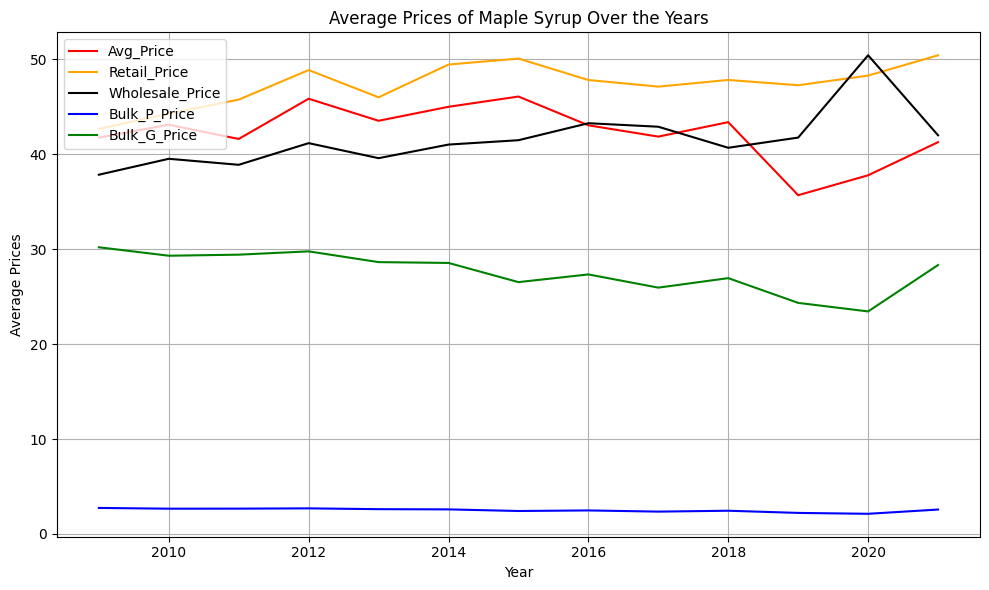

In [21]:
average_prices_over_years = df.groupby('Year')[['Avg_Price', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price']].mean().reset_index()
plt.figure(figsize=(10, 6))
years = average_prices_over_years['Year']
colors = ['red','orange', 'black','blue','green']
price_columns = ['Avg_Price', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price']
for i in range(len(colors)):
    plt.plot(years, average_prices_over_years[price_columns[i]], label=price_columns[i], color = colors[i])
plt.xlabel('Year')
plt.ylabel('Average Prices')
plt.title('Average Prices of Maple Syrup Over the Years')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Comparative Analysis of Yield per Tap and Tap Count by State:
Undertaking a meticulous examination of the interplay between yield per tap and the count of taps, juxtaposed against the geographical delineation of states.

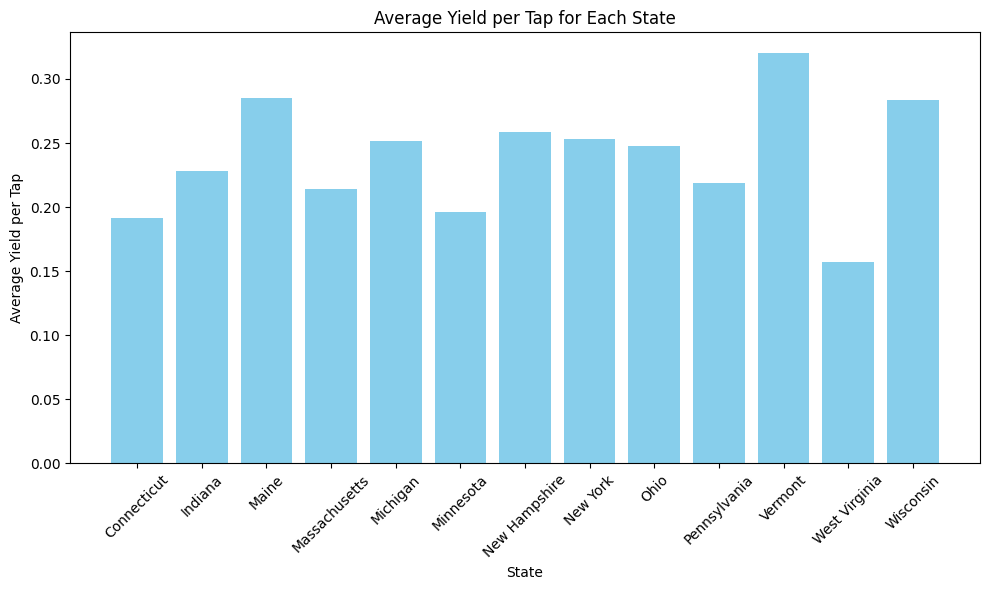

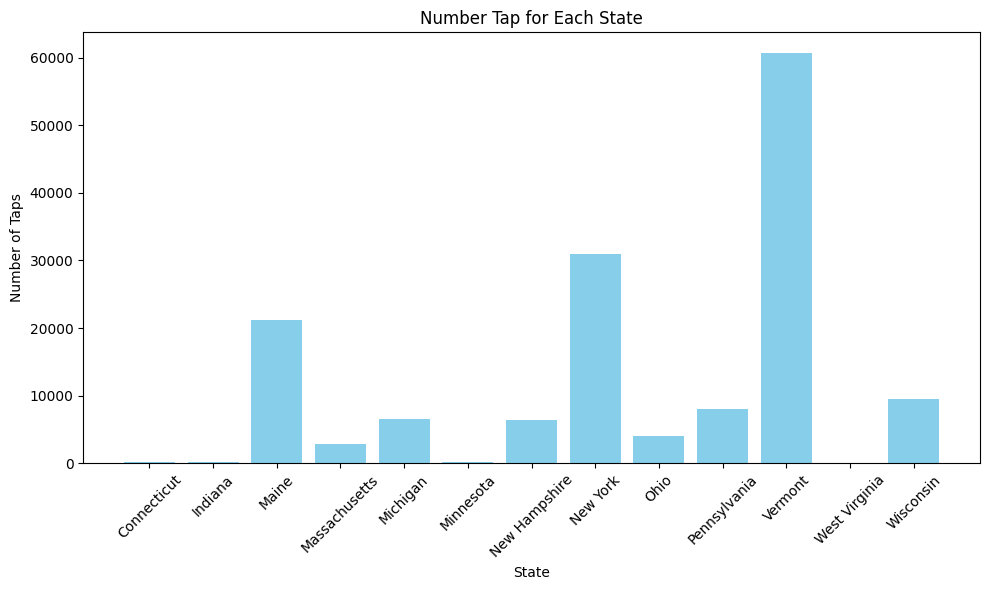

In [22]:
average_yield_per_tap = df.groupby('State')['Yield_per_Tap'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_yield_per_tap['State'], average_yield_per_tap['Yield_per_Tap'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Yield per Tap')
plt.title('Average Yield per Tap for Each State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
Num_of_Taps_viz = df.groupby('State')['Num_of_Taps'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(Num_of_Taps_viz['State'], Num_of_Taps_viz['Num_of_Taps'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Taps')
plt.title('Number Tap for Each State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Temporal Survey of Syrup Production Performance:
Conducting a systematic survey of the performance metrics associated with syrup production, elucidated in a temporal context.

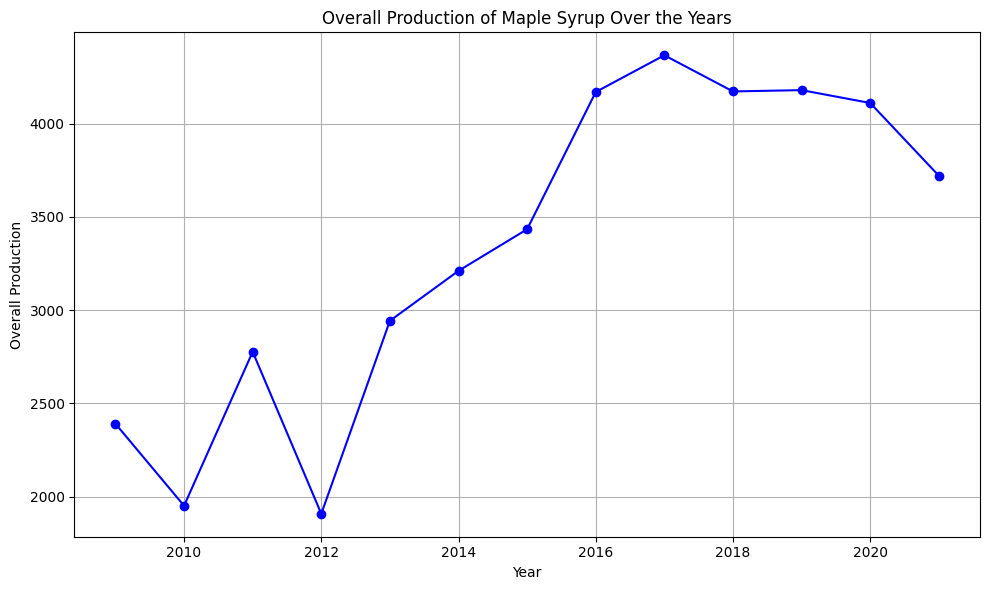

In [23]:
overall_production = df.groupby('Year')['Production'].sum().reset_index()
plt.figure(figsize=(10, 6))
years = overall_production['Year']
production = overall_production['Production']
plt.plot(years, production, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Overall Production')
plt.title('Overall Production of Maple Syrup Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

State-wise Variation of Syrup Price Averages Over Time:
Investigating the fluctuation patterns of average syrup prices across different states, observed chronologically.

Temporal Exploration of Syrup Price Trends Across States:
Delving into an exploration of trends in syrup prices, aggregated by state and analyzed longitudinally.

In [24]:
average_prices = df.groupby(['State', 'Year'])[['Avg_Price']].mean().reset_index()
fig = px.line(average_prices, x='Year', y=['Avg_Price'],
              color='State', labels={'variable': 'Price Type', 'value': 'Average Prices'},
              title='Average Prices of Maple Syrup in Different States Over the Years')
fig.show()

AttributeError: module 'plotly' has no attribute 'line'

Interrelated Price Dynamics and Production Metrics:
An observation emerges wherein the prices exhibit a notable interrelation, reflecting a degree of correlation amongst themselves. Additionally, a robust correlation surfaces between the production volume and the count of taps employed.Evident within this analysis is a substantial interdependence among prices, showcasing a coherent correlation among these variables. Furthermore, a pronounced correlation surfaces between the production volume and the aggregate tap count.

In [25]:
selected_columns = df.columns
selected_df = df[selected_columns]
correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Maine'

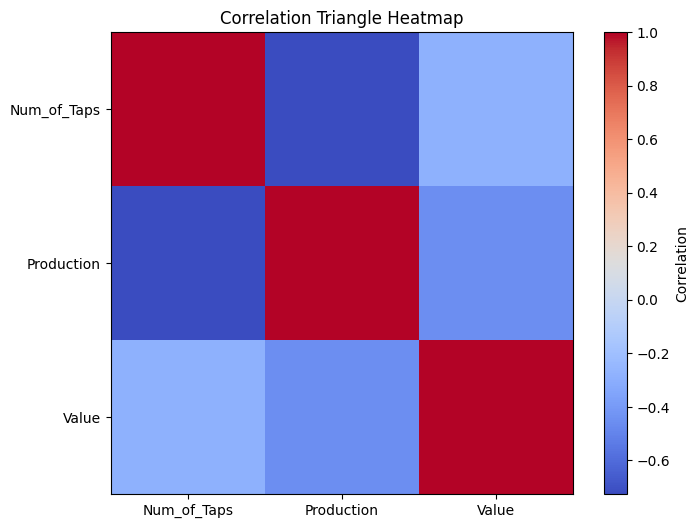

In [26]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.rand(3, 3)
corr_matrix = np.corrcoef(data)
mask = np.triu(np.ones_like(corr_matrix), k=1)
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap, label='Correlation')
variables = ['Num_of_Taps', 'Production', 'Value']
plt.xticks(range(len(variables)), variables)
plt.yticks(range(len(variables)), variables)
plt.title('Correlation Triangle Heatmap')
plt.show()


# **MODEL**

Categorical Column Encoding for Enhanced Data Representation:
To enhance the effectiveness of the data representation, the categorical columns are subjected to encoding. This involves the transformation of categorical variables into numerical values that are more compatible with machine learning algorithms. This step aids in avoiding biases in model training and fosters a more comprehensive analysis of the dataset.


In [ ]:
#f1 = pd.get_dummies(df1, columns = ['State', 'Year'])


Segmenting Data into Dependent and Independent Variables:
The data division process involves segregating the dataset into two distinct components: the dependent variable, also known as the target variable, and the independent data variables. This segregation is pivotal for establishing a clear distinction between the outcome to be predicted and the variables that influence it. Such separation facilitates the subsequent modeling and analysis phases by providing a structured foundation for understanding relationships and making predictions.

In [27]:
y = df1['Avg_Price']

In [28]:
x = df1.drop(['Avg_Price','State', 'Year','Num_of_Taps'], axis=1)

Allocation of Data for Training and Testing :
In order to effectively train and evaluate the model's performance, an 80-20 data allocation strategy is employed. Specifically, 80% of the dataset is designated for training the model, enabling it to learn patterns and relationships within the data. The remaining 20% is reserved for testing the model's predictive capabilities, thereby assessing its generalization and accuracy in making predictions on new, unseen data instances. This division ensures a robust assessment of the model's efficacy and its potential to perform well in real-world scenarios.

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=30)

Normalization of the Data Through MinMax Scaling:
In order to standardize the data, the process of scaling is executed, wherein the MinMaxScaler tool from the sklearn library is employed. This technique ensures that the dataset's features are rescaled within a predefined range, thereby facilitating uniformity and comparability across the variables.

In [81]:
scaler = MinMaxScaler()


In [109]:
X_test.shape


(41, 7)

In [ ]:
first_row_values = X_train.iloc[0].values

Normalization of Features in Training and Testing Data :
To ensure consistent and optimal model performance, all columns in both the training and testing datasets are subjected to a scaling process. This scaling is achieved through normalization, specifically utilizing the Min-Max Scaler from the sklearn library. By uniformly scaling the features within a specified range, typically [0, 1], the model's training process is enhanced, as it becomes less sensitive to varying magnitudes across features. This practice aids in preventing any particular feature from exerting undue influence on the model's learning process, ultimately contributing to improved convergence and robustness during training and testing phases.

In [83]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

In [84]:
X_test.shape

(41, 7)

In [85]:
X_test[0]

array([0.54418605, 0.0403286 , 0.0552813 , 0.54545455, 0.50439883,
       0.83333333, 0.90026954])

Dimensions of Training and Testing Datasets:
The shape of the training dataset and the testing dataset are crucial indicators of their respective sizes and compositions. In this context, the term 'shape' refers to the number of rows and columns present in each dataset. The training dataset comprises a certain number of samples used to train the model, with each sample possessing a set of features and the corresponding target variable. Similarly, the testing dataset holds distinct samples for evaluating the trained model's performance. A comprehensive understanding of the shape of these datasets assists in comprehending their sizes and the manner in which they are organized for model development and validation.

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 7)
(41, 7)
(164,)
(41,)


Construction of LSTM Model Architecture:
The development of the Long Short-Term Memory (LSTM) model involves the sequential assembly of various layers to form a coherent network. The layers encompassed within this architecture include the input layer, LSTM layer, dense layer, and flatten layer.

1. Input Layer: At the initial stage, an input layer is established to ingest the data. This layer functions as the gateway through which the data is introduced into the network for further processing.

2. LSTM Layer: Following the input layer, an LSTM layer is integrated. LSTM, as a specialized type of recurrent neural network, excels in capturing temporal dependencies within sequential data. This layer operates by maintaining a memory cell that enables the network to learn and remember patterns over varying time intervals.

3. Dense Layer: Subsequently, a dense layer is incorporated. This layer facilitates the transformation of the extracted features from the previous LSTM layer into a format suitable for generating predictions. The dense layer employs multiple interconnected nodes to perform complex computations.

4. Flatten Layer: The final layer is the flatten layer, which serves to convert the multidimensional output from the previous layer into a one-dimensional array. This transformation is essential for presenting the data in a format compatible with the desired output.

The assembly of these layers results in an intricate LSTM architecture capable of processing sequential data, capturing temporal patterns, and generating predictions. This model architecture holds significance in various applications such as time series forecasting, natural language processing, and more, owing to its proficiency in handling sequential data.

In [ ]:
X_train.shape[1],1

(7, 1)

In [31]:
inputs = Input(shape=(X_train.shape[1],1))
print(inputs.shape)
x = LSTM(64, return_sequences=True)(inputs)
x = Dropout(0.50)(x)
x = LSTM(16)(x)
x = Flatten()(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = Dropout(0.40)(x)
x = tf.keras.layers.Dense(16,activation='relu')(x)
outputs = Dense(1, activation='relu')(x)
print(outputs.shape)
model_2 = tf.keras.Model(inputs,outputs)
model_2.summary()

(None, 7, 1)
(None, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 7, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 7, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dropout_1 (Dropout)         (None, 64

Model Compilation with Mean Squared Error (MSE):
The next phase involves the compilation of the previously constructed LSTM model. This compilation is executed by integrating a specific loss function, optimizer, and evaluation metric. In this context, the Mean Squared Error (MSE) is selected as the loss function.

1. Mean Squared Error (MSE): The MSE is a pivotal loss function employed in regression tasks. It quantifies the disparity between the predicted values and the actual target values by calculating the squared differences and then computing their average. Utilizing MSE as the loss function promotes the model's capability to minimize the overall prediction error.

2. Optimizer: To enhance the model's convergence during training, an optimizer is implemented. Commonly, optimizers like Adam or RMSprop are selected. These optimizers adjust the model's parameters iteratively based on the computed gradients, thus optimizing the model's performance.

3. Evaluation Metric: Additionally, an evaluation metric is specified to assess the model's performance during training and testing. This metric aids in comprehending how well the model aligns with the desired outcomes. For regression tasks, Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) are frequently utilized metrics.

By incorporating MSE as the loss function, along with an appropriate optimizer and evaluation metric, the LSTM model is primed for training and prediction. This meticulous compilation process streamlines the model's learning process, enabling it to iteratively refine its parameters to achieve accurate predictions.

In [32]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='mse',
                  metrics=['mse'])

Model Training with 100 Epochs:
The process of training the LSTM model is initiated by fitting it to the training data. This training phase encompasses multiple iterations known as epochs. Each epoch involves presenting the model with the training data, enabling it to learn and adjust its parameters to improve its predictive performance. In this context, the LSTM model is trained over the training data for a total of 100 epochs.


In [33]:
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=100
                       )

Epoch 1/100
6/6 [==============================] - 28s 36ms/step - loss: 1594.5278 - mse: 1594.5278
Epoch 2/100
6/6 [==============================] - 0s 30ms/step - loss: 1560.7587 - mse: 1560.7587
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 1525.3751 - mse: 1525.3751
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 1476.2811 - mse: 1476.2811
Epoch 5/100
6/6 [==============================] - 0s 33ms/step - loss: 1413.3262 - mse: 1413.3262
Epoch 6/100
6/6 [==============================] - 0s 38ms/step - loss: 1334.1343 - mse: 1334.1343
Epoch 7/100
6/6 [==============================] - 0s 31ms/step - loss: 1227.0927 - mse: 1227.0927
Epoch 8/100
6/6 [==============================] - 0s 21ms/step - loss: 1098.5746 - mse: 1098.5746
Epoch 9/100
6/6 [==============================] - 0s 28ms/step - loss: 974.8562 - mse: 974.8562
Epoch 10/100
6/6 [==============================] - 0s 33ms/step - loss: 826.6086 - mse: 826.6086
Epoch 11/100

Evaluation of Model Performance on Test Data:
The performance assessment of the LSTM model is a crucial step in gauging its predictive capabilities on unseen or test data. After the model has been trained on the training dataset, it is imperative to evaluate its predictive accuracy and generalization potential on a separate and previously unseen portion of the data known as the test data.



In [34]:
model_2.evaluate(X_test,y_test)

2/2 [==============================] - 5s 16ms/step - loss: 87.6060 - mse: 87.6060


[87.60601806640625, 87.60601806640625]

In [ ]:
#import pickle
#model = pickle.load(open('model.pkl','rb'))
#scale = pickle.load(open('scale.pkl','rb'))

In [35]:
import pickle
pickle.dump(model_2,open('model1.pkl','wb') )
#pickle.dump(scaler,open('scale1.pkl','wb') )

In [36]:
data = [[0.260,65.0,3023.0,48.0,42.2,3.15,34.7]]
#data = scaler.fit_transform(data)
prediction = model_2.predict(data) 
#pred = scaler.inverse_transform(prediction)
prediction[0][0]

1/1 [==============================] - 4s 4s/step


47.017265

In [29]:
pred_scaled = model_2.predict([[0.54418605, 0.0403286 , 0.0552813 , 0.54545455, 0.50439883,
        0.83333333, 0.90026954]])
pred_scaled


1/1 [==============================] - 0s 142ms/step


array([[28.577082]], dtype=float32)

Calculating Percentage Error in the Model Predictions":
The assessment of model accuracy often involves quantifying the disparity between predicted values generated by the model and the actual target values present in the test dataset. One common method for expressing this disparity is through the calculation of the percentage error.

In [37]:
y_pred_scaled = model_2.predict(X_test)
y_pred =y_pred_scaled
y_test_unscaled = y_test.values.reshape(-1, 1)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')
MAPE = np.mean((np.abs( np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

2/2 [==============================] - 5s 11ms/step
Median Absolute Error (MAE): 6.65
Mean Absolute Percentage Error (MAPE): 16.04 %
Median Absolute Percentage Error (MDAPE): 13.51 %


In [93]:
y_pred_scaled = model_2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')
MAPE = np.mean((np.abs( np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

2/2 [==============================] - 0s 6ms/step


ValueError: non-broadcastable output operand with shape (41,1) doesn't match the broadcast shape (41,7)

The training loss demonstrates how well the model is fitting to the training data, while the testing loss indicates its performance on previously unseen data. By analyzing the plot, we can deduce various insights. Ideally, both loss curves should decline steadily as training progresses, signifying effective learning. Any significant divergence between the two curves might indicate overfitting, where the model performs well on training data but struggles with new data. Conversely, if both curves stagnate at higher values, it could indicate underfitting, where the model fails to capture the underlying patterns in the data.

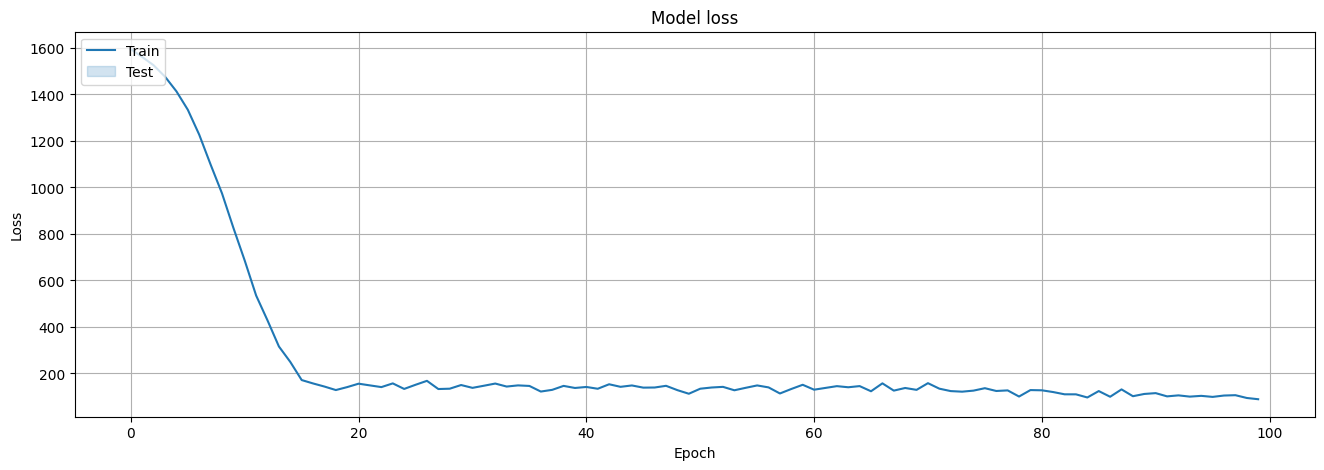

In [38]:
epochs = range(100)
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history_2.history["loss"])
#sns.lineplot(data=history_3.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

Analysis of Discrepancies between Predicted and Actual Test Values:
Within this phase of our investigation, our focus centers on scrutinizing the disparities existing between the values anticipated by our predictive model and the actual values present in the test dataset. Such an analysis serves as a critical gauge for the model's precision and its capability to generalize its learning to new data. It is a fundamental checkpoint that guides us in refining our model, enhancing its predictive capabilities, and fostering its real-world applicability.

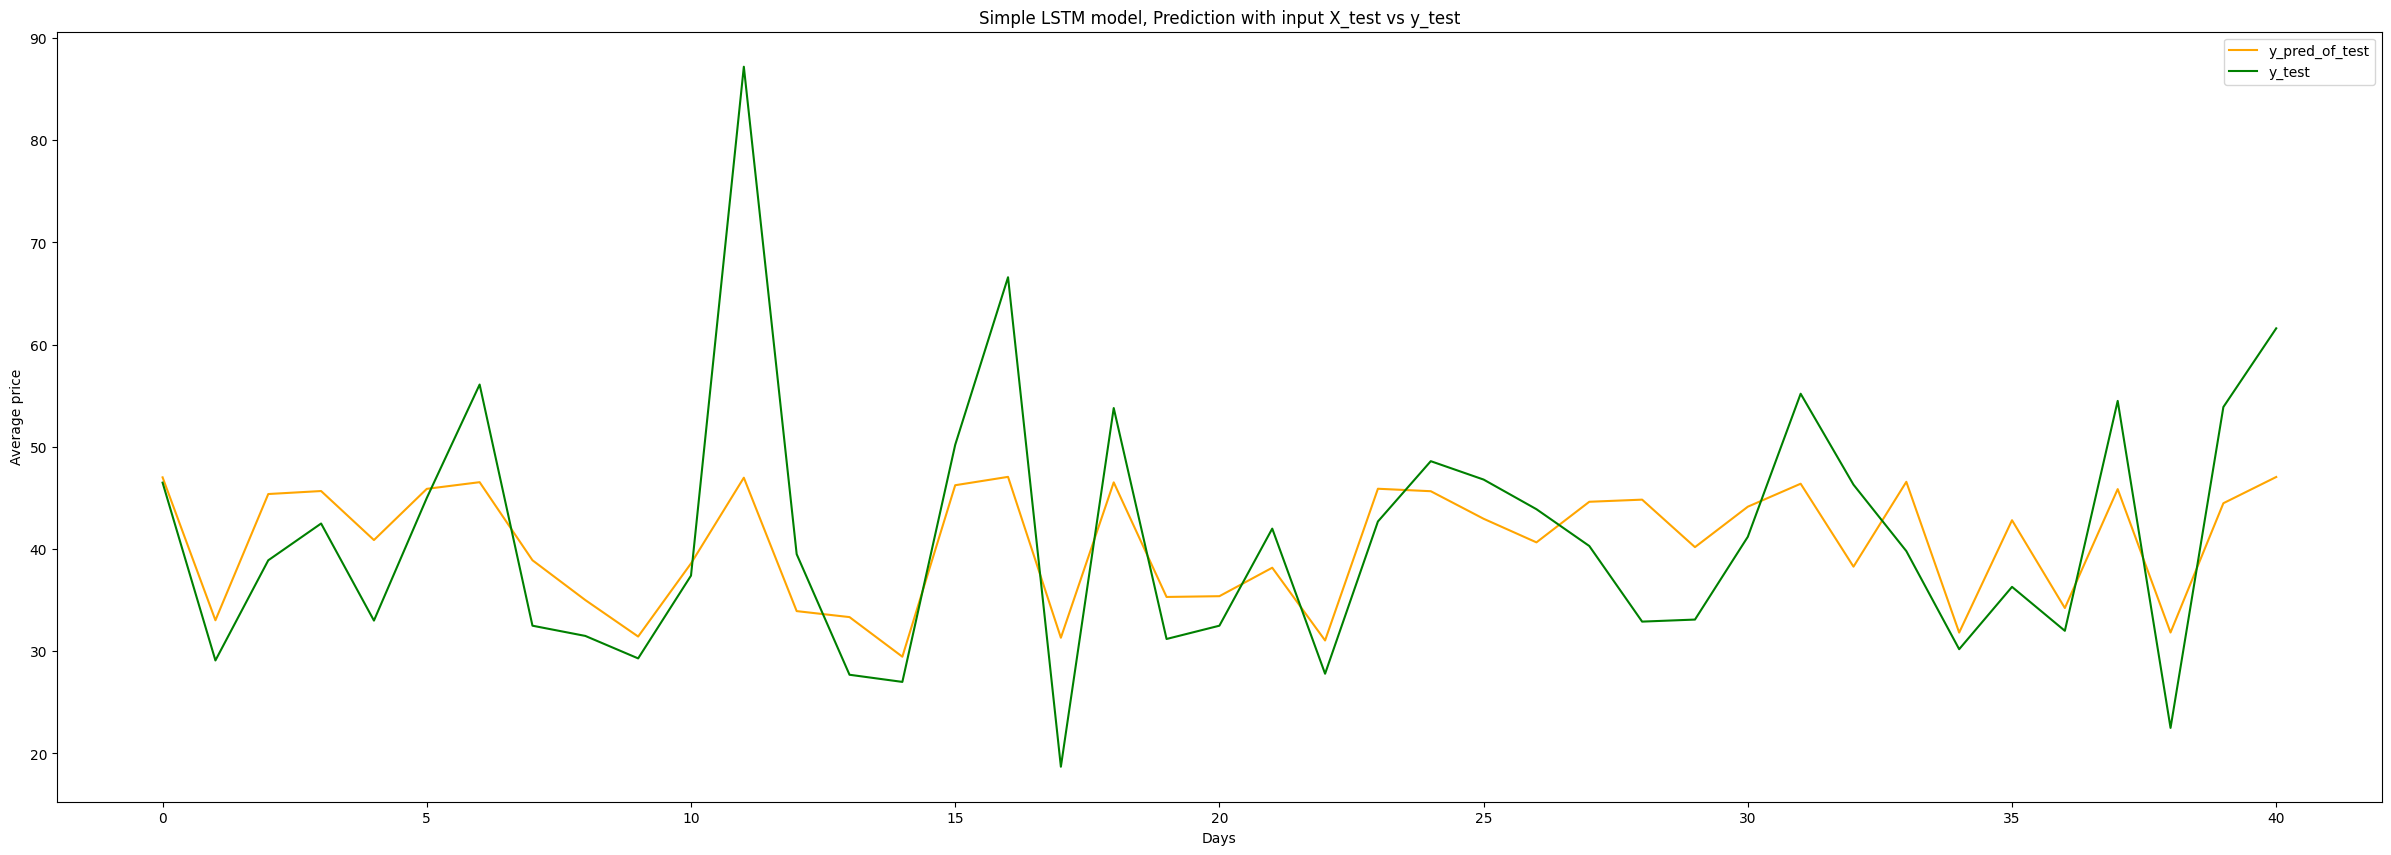

In [39]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, label = "y_pred_of_test", c = "orange")
plt.plot(y_test_unscaled, label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Average price")
plt.title("Simple LSTM model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

Visualization of Training, Testing, and Predicted Dependent Variable Values with Residual Analysis":
In this visual representation, we aim to elucidate the distinctions and resemblances encompassing the training, testing, and predicted values of the dependent variable. Furthermore, we integrate an analysis of residuals into this graphical portrayal.

By plotting the actual observed values against the predicted values, we gain insights into the model's performance across different datasets. The alignment of data points along a specific trendline signifies the model's competence in capturing the inherent patterns within the data. However, deviations from this trendline, which represent residuals, unveil areas where the model's predictions diverge from the actual outcomes.


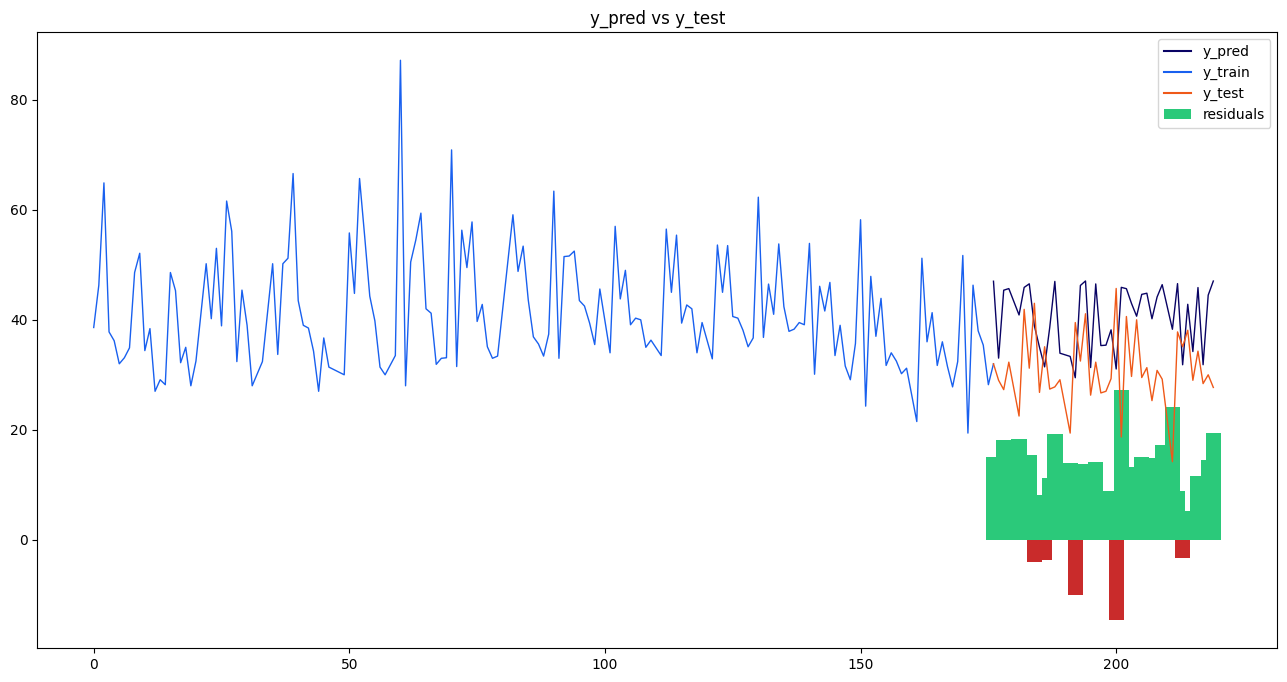

In [40]:
train = pd.DataFrame(df1['Avg_Price'][:len(X_train)+ 1]).rename(columns={'Avg_Price': 'y_train'})
valid = pd.DataFrame(df1['Avg_Price'][len(X_train):]).rename(columns={'Avg_Price': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union["residuals"].dropna()]
ax1.bar(height=df_union['residuals'].dropna(), x=df_union['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()